## Figure S4
###### Last updated 2023-02-10
This notebook generates the Rg histograms associated with the NYD or rU10 (or rU25 if you set mode == `rU25`) in the  bound vs. unbound conformations.

The full trajectory files associated with this analysis are available on Zenodo (see the main readme file for the specific deposition info).

In [1]:
from soursop.sstrajectory import SSTrajectory
import mdtraj as md
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import matplotlib

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'Arial',
        'weight' : 'normal'}

matplotlib.rc('font', **font)

# define this so we can read in nucleotides
NA_EXTENSION = ['D5P', 'DPC',  'DPU',  'DPT',  'DPA',  'DPG',  'R5P',  'RPC' , 'RPU',  'RPT',  'RPA',  'RPG']


### Things you might want to change
The directory below contains things you may want to change in this notebook...

In [2]:
# defines directory where data is kept. If you download the trajectories from ZENODO you'd need to
# update this info here ofc
prefix = '../data/bound_and_unbound_trajectories/'

# defines the mode to be used = this must 
mode = 'rU25'


##
## No need to change anything below here!
## 


In [12]:
if mode not in ['rU25', 'rU10']:
    raise Exception('Must provide a valid mode')


# NOTE - these trajectories are too large to distribute via GitHub - to download them
# please see the readme.md file in the data/bound_and_unbound_trajectories which should point you to a Zenodo repository

bound_traj = SSTrajectory(f'{prefix}/{mode}_bound_traj.xtc', f'{prefix}/{mode}_bound_traj.pdb', extra_valid_residue_names=NA_EXTENSION)
unbound_traj = SSTrajectory(f'{prefix}/{mode}_unbound_traj.xtc', f'{prefix}/{mode}_unbound_traj.pdb', extra_valid_residue_names=NA_EXTENSION)



In [4]:
rg_NTD_bound = bound_traj.proteinTrajectoryList[0].get_radius_of_gyration(R1=0,R2=50)
rg_NTD_unbound = unbound_traj.proteinTrajectoryList[0].get_radius_of_gyration(R1=0,R2=50)

In [5]:
bin_width=1
max_val=40
bins = np.arange(0,max_val, bin_width)


[counts_bound,   b] = np.histogram(rg_NTD_bound, bins)
[counts_unbound, b] = np.histogram(rg_NTD_unbound, bins)

plot_bins = (b+bin_width*0.5)[:-1]

In [6]:
print(len(rg_NTD_bound))
print(len(rg_NTD_unbound))
print(np.mean(rg_NTD_bound))
print(np.mean(rg_NTD_unbound))


8198
81347
19.566734635101344
19.12604600484115


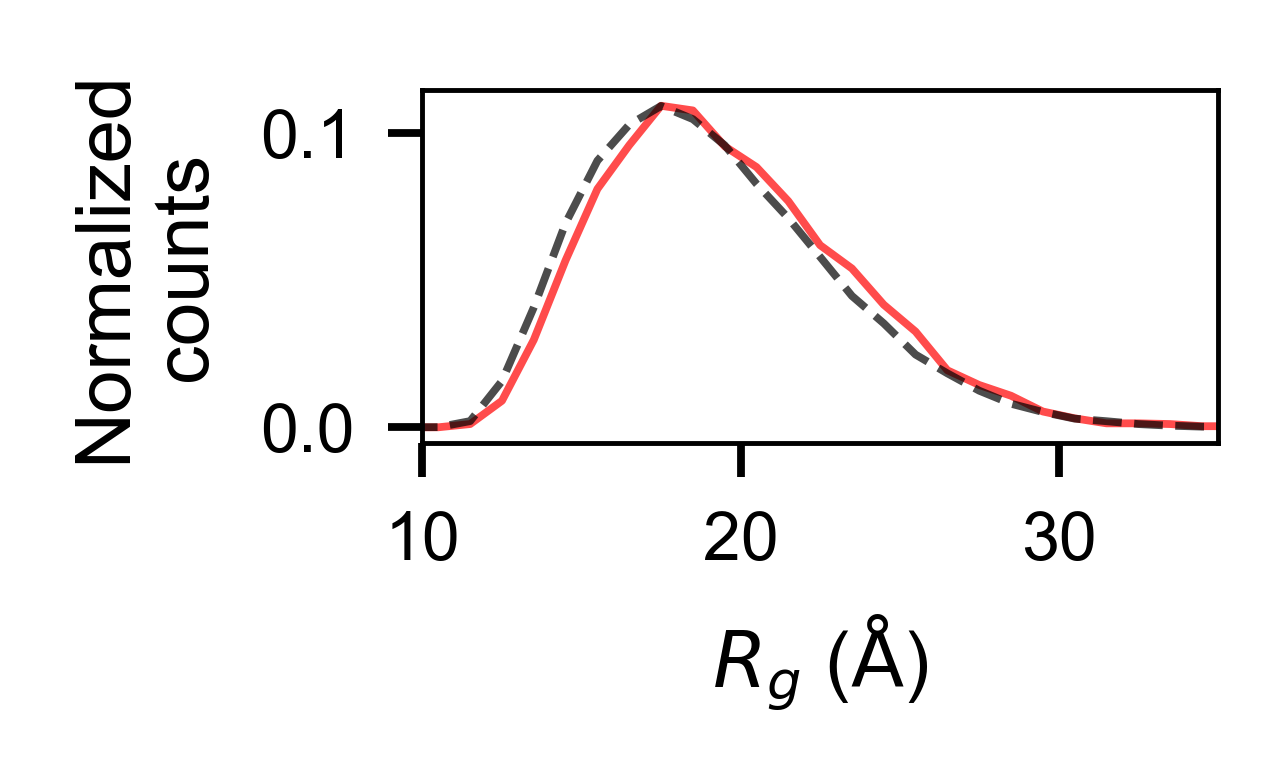

In [7]:
figure(None,(2,1.2), dpi=350)

counts_bound_norm = counts_bound/len(rg_NTD_bound)
plt.plot(plot_bins, counts_bound_norm, color='r', alpha=0.7, linewidth=0.8, label='bound')

counts_unbound_norm = counts_unbound/len(rg_NTD_unbound)
plt.plot(plot_bins, counts_unbound_norm, '--',color='k', alpha=0.7,linewidth=0.8, label='unbound')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim([10,35])
#plt.ylim([0,8000])
plt.xlabel(r'$R_g$ ($\rm\AA$)',fontsize=8)
plt.ylabel('Normalized\ncounts',fontsize=8)
plt.tight_layout()

print()
plt.savefig(f'figures/{mode}_bound_unbound_ntd_rgs.pdf')


In [8]:
rg_RNA_bound = bound_traj.proteinTrajectoryList[1].get_radius_of_gyration()
rg_RNA_unbound = unbound_traj.proteinTrajectoryList[1].get_radius_of_gyration()

In [9]:
print(len(rg_RNA_bound))
print(len(rg_RNA_unbound))
print(np.mean(rg_RNA_bound))
print(np.mean(rg_RNA_unbound))

8198
81347
10.562804063228999
10.65230173905139


In [10]:
bin_width=1
max_val=40
bins = np.arange(0,max_val, bin_width)


[counts_bound,   b] = np.histogram(rg_RNA_bound, bins)
[counts_unbound, b] = np.histogram(rg_RNA_unbound, bins)

plot_bins = (b+bin_width*0.5)[:-1]

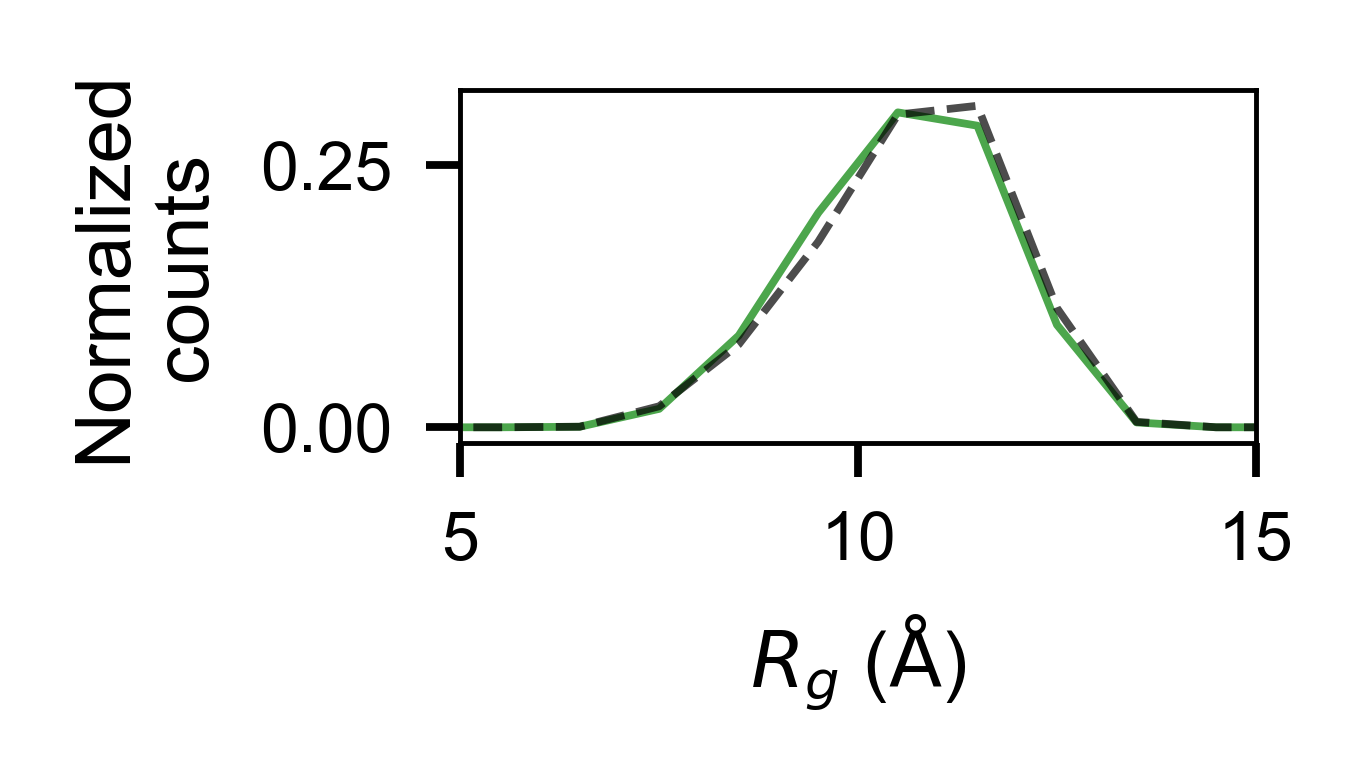

In [11]:
figure(None,(2,1.2), dpi=350)

counts_bound_norm = counts_bound/len(rg_RNA_bound)
plt.plot(plot_bins, counts_bound_norm, color='green', alpha=0.7, linewidth=0.8, label='bound')



counts_unbound_norm = counts_unbound/len(rg_RNA_unbound)
plt.plot(plot_bins, counts_unbound_norm, '--',color='k', alpha=0.7,linewidth=0.8, label='unbound')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

if mode == 'rU25':
    plt.xlim([10,35])
elif mode == 'rU10':
    plt.xlim([5,15])
#plt.ylim([0,8000])
plt.xlabel(r'$R_g$ ($\rm\AA$)',fontsize=8)
plt.ylabel('Normalized\ncounts',fontsize=8)
plt.tight_layout()
print()
plt.savefig(f'figures/{mode}_bound_unbound_RNA_rgs.pdf')
